## Homework 3 - due Friday, February 11th by 4 PM 

Name: Therrin Baker

In [2]:
# Use this cell to import all necessary packages for the assignment 
import numpy as np
import matplotlib.pyplot as plt
import qdraw as qd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="vpython")

from vpython import *


<IPython.core.display.Javascript object>

### Problem 1: Exercise 

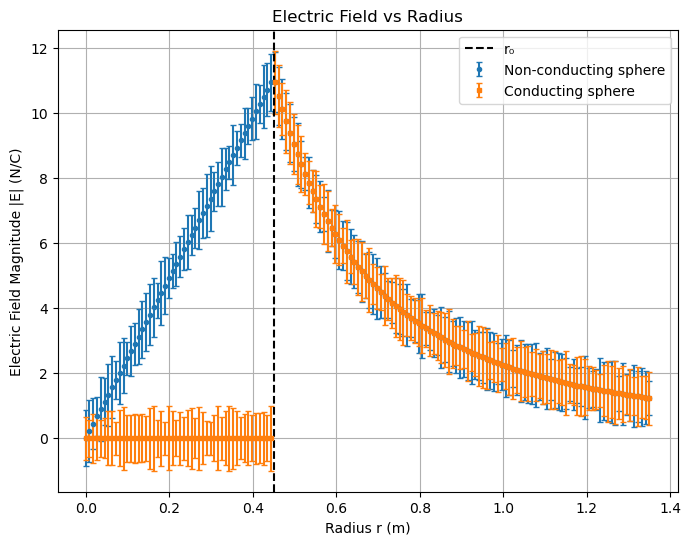

In [24]:
# This is cell is where I would put all my code
# type all of your code in here and make sure you RUN it. I want to see the output. 
epsilon0 = 8.854e-12 #F/m
Q = 0.250e-9 #C
radi0 = 0.450 #m

Point_Count = 150
radi = np.linspace(0.,3*radi0, Point_Count)

E_nonconducting = np.zeros(Point_Count)
E_conducting = np.zeros(Point_Count)

for i in range(Point_Count):
    if radi[i]==0:
        E_conducting[i] = 0.0
        E_nonconducting[i] = 0.0
    else:
        if radi[i] < radi0:
            E_nonconducting[i] = (1/(4*np.pi*epsilon0)) * (Q * radi[i] / radi0**3)
            E_conducting[i] = 0.0
        else:
            E_nonconducting[i] = (1/(4*np.pi*epsilon0)) * (Q / radi[i]**2)
            E_conducting[i] = (1/(4*np.pi*epsilon0)) * (Q / radi[i]**2)

err_nonconducting = np.zeros(Point_Count)
err_conducting = np.zeros(Point_Count)

for i in range(Point_Count):
    err_nonconducting[i] = np.random.uniform(0.5, 1.0)
    err_conducting[i] = np.random.uniform(0.5, 1.0)
    
    
plt.figure(figsize=(8,6))

plt.errorbar(radi, E_nonconducting, yerr=err_nonconducting,
             fmt='o', markersize=3, capsize=2,
             label='Non-conducting sphere')
plt.errorbar(radi, E_conducting, yerr=err_conducting,
             fmt='s', markersize=3, capsize=2,
             label='Conducting sphere')

plt.axvline(radi0, linestyle='--', color='k', label='r₀')

plt.xlabel('Radius r (m)')
plt.ylabel('Electric Field Magnitude |E| (N/C)')
plt.title('Electric Field vs Radius')
plt.legend()
plt.grid(True)

plt.show()

##### Explanation: 

The first part of the code establishes constants and some parameters so the electric field can be later evaluated. I then use a for loop, with nested if/else statements, to properly evaluate the electric field of the conducting and non-conducting spheres. I then create two additional arrays that act as the error bars, before putting it all together in the graph. All other choices were largely just because I thought it looked better.

### Problem 2: Exercise 

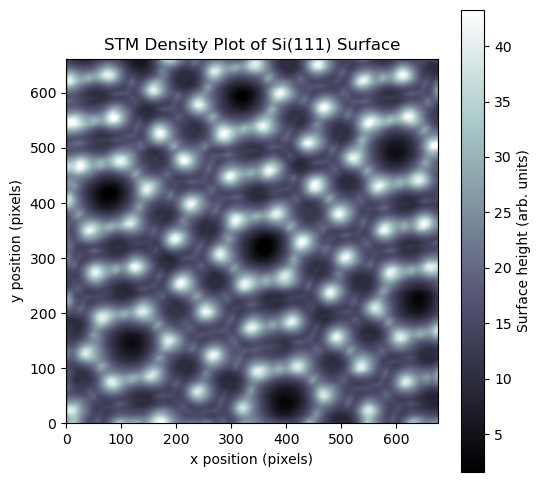

In [21]:
# code
silicon_data = np.loadtxt('stm.txt')

plt.figure(figsize=(6,6))

plt.imshow(silicon_data,
           origin='lower',
           cmap='bone',
           aspect='equal')

color_bar = plt.colorbar()
color_bar.set_label('Surface height (arb. units)')

plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('STM Density Plot of Si(111) Surface')

plt.show()

#### Explanation: 
I first load in the data, before using different matplotlib.pyplot functions to graph. I specifically chose the imshow function as this is a density plot, and as such I also included a color bar.

### Problem 3: Exercise 

In [ ]:
Atom_Count = 10
spacing = 40
radi = 0.4

scene = qd.window(xlim=[0, Atom_Count], ylim=[0, Atom_Count])

#NaCl
for i in range(Atom_Count):
    for j in range(Atom_Count):
        X = i * spacing
        Y = j * spacing
        if (i+j)%2==0:
            qd.circle(size=radi, pos=[X, Y], color='blue')
            
        else:
            qd.circle(size=radi, pos=[X, Y], color='green')
qd.draw()           

: 

In [ ]:
Atoms_Count = 8
spacing = 50
radius = 0.6

scene = qd.window(xlim=[0, Atom_Count], ylim=[0, Atom_Count])

for i in range(N):
    for j in range(N):
        x = i * spacing
        y = j * spacing
        qd.circle(circle=radius,pos=[x,y], color='blue')
for i in range(N - 1):
    for j in range(N - 1):
        x = i * spacing + spacing / 2
        y = j * spacing + spacing / 2
        qd.circle(circle=radius,pos=[x,y], color='red')
qd.draw()

#### Explanation: 
I start by defining the parameters for each of the scripts above, before making the scene, and then running for loops for the appropriate placement of the circles. I had a lot of trouble error checking my code here, and cannot get it to work consistently - likely due to the qd.draw module itself - as half the time the code displays properly and the other half my code simply draws a single circle in the middle of the screen.

### Problem 4: Exercise 

In [ ]:
planets = [
    ("Mercury", 2440, 57.9, 88.0, color.gray(0.6)),
    ("Venus", 6052, 108.2, 224.7, color.orange),
    ("Earth", 6371, 149.6, 365.3, color.blue),
    ("Mars", 3386, 227.9, 687.0, color.red),
    ("Jupiter", 69173, 778.5, 4331.6, color.orange),
    ("Saturn", 57316, 1433.4, 10759.2, color.yellow)
]

c1 = 3000 #planet scale factor
c2 = 500 #time factor

scene = canvas(title="Inner Solar System",
               width=1000, height=800,
               background=color.black)

sun = sphere(pos=vector(0,0,0),
             radius=50,
             color=color.yellow)

planet_objs = []

for name, radius_km, orbit_mkm, period_days, col in planets:
    r_scaled = (radius_km / 1e6) * c1   # convert km to millions of km, then scale
    orbit_radius = orbit_mkm            # keep real proportional distance
    
    planet = sphere(pos=vector(orbit_radius, 0, 0),
                    radius=r_scaled,
                    color=col,
                    make_trail=False)
    
    planet.orbit_radius = orbit_radius
    planet.period = period_days
    planet_objs.append(planet)

t = 0
dt = 0.5   # time step in days (simulation time)

while True:
    rate(10)
    t += dt * c2   # accelerate time
    
    for planet in planet_objs:
        omega = 2 * np.pi / planet.period
        theta = omega * t
        x = planet.orbit_radius * np.cos(theta)
        y = planet.orbit_radius * np.sin(theta)
        planet.pos = vector(x, y, 0)

NameError: name 'color' is not defined

#### Explanation: 
First I start by defining list of 'tuples' (I had to look this up), additionally defining some parameters, before making the scene and sun. Then using my list of tuples and a for loop I define each of the planets. Lastly I define the time, and use a while loop to update the time indefinitely - and update the positions of the planets using a for loop and the associated time. 

### Problem 5: 

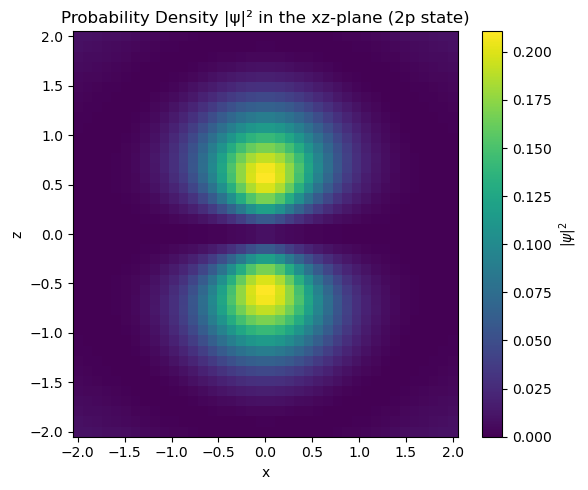

In [5]:
def psi(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return z * (2 - r) * np.exp(-r)

Point_Count = 40

x = np.linspace(-2, 2, Point_Count)
z = np.linspace(-2, 2, Point_Count)
X, Z = np.meshgrid(x, z)
Y = 0

psi_vals = psi(X, Y, Z)
prob_density = np.abs(psi_vals)**2

plt.figure(figsize=(6, 5))
plt.pcolormesh(X, Z, prob_density, shading='auto')
plt.colorbar(label=r'$|\psi|^2$')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Probability Density |ψ|² in the xz-plane (2p state)')
plt.tight_layout()
plt.show()

#### Explanation: 
First I start by defining the wavefunction before defining some parameters and arrays. Then using the user defined function of the wavefunction I act it on the arrays I just defined, before converting the wavefunction from probability amplitude to probability. Lastly I graph everything using a a pcolormesh to display the density plot, which -to my understanding - allows me to essentially combine all the layers in the y direction into a singular graph.

### Problem 6: 

#### Explanation: 